In [19]:
# 기본적인 임포트
import matplotlib.pyplot as plt
import numpy as np

테스트 세트의 사용방법에 대해 조금 더 깊이 알아보자  
목표는 <b>어느 데이터 세트에만 치우친 모델을 만들지 않는 것</b> 이다.  


In [5]:
# 데이터 가져오기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer( )

In [10]:
# 데이터 분할
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size=0.2, random_state=42)

In [11]:
# 로지스틱 회귀로 모델 훈련 및 평가
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', random_state = 42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8333333333333334

정확도는 약 83.33%다.  
여기서 loss는 사용자가 직접 선택하는 파라미터로 이것을  
하이퍼 파라미터라고 부른다.  
loss값을 바꿔서 성능이 변하는지 확인해보자  


In [12]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', random_state = 42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

loss 값만 바꿨는데 정확성이 약94%까지 올랐다.  
이런식으로 매개변수를 바꿔보는 것을 '모델을 튜닝한다.' 라고 한다.  
그러나 이 모델은 실전에서 좋은 성능을 낼 가능성이 낮다.  
이유가 뭘까?

---
### 테스트 세트로 모델을 튜닝하면 실전에서 좋은 성능이 나오기 어렵다.
  
이유는 간단하다.  
테스트 세트에 대해서만 좋은 성능을 보여주는 모델이 되기 때문이다.  
계산하는 방법을 알아야하는데, 답안지만 달달 외우게한 꼴이기 때문이다.  
  
</br>

그러면 어떻게 해야할까?  
튜닝할 때 테스트 세트를 사용하지 않으면 된다.  
테스트 세트는 모델 튜닝을 모두 마치고 실전에 투입하기 전에 딱 한번만 사용하자  


In [13]:
# 데이터 세트 준비 및 분할하기 (위에 작성했던 코드)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer( )
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size=0.2, random_state=42)

In [16]:
# 검증세트 분할
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
print(len(x_train), len(x_val))

364 91


455개의 훈련세트가 8:2 비율로 나누어져 훈련세트는 364개, 검증세트는 91개가 되었다.  

In [17]:
# 모델 평가
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.6923076923076923

사실 이 데이터 세트의 샘플 수는 적은 편이다.  
데이터 양이 적으니 검증세트 비율이나 random_state값을 조금만 바꿔도 점수가 크게 변한다.  
이런 경우에는 교차검증을 도입하기도 한다.  
그러나 요즘엔 대량의 데이터를 쉽게 모을 수 있다.  
일반적으로 10만개의 데이터가 있다면 8:1:1 정도로 분할한다.  
100만개 이상의 데이터는 98:1:1 정도로 분할한다.  
  
아무튼 이 세트를 사용해보자


---

# 전처리

실습과 달리, 실전에서 수집된데이터는 누락된 값이 있거나 데이터 형태가  
균일하지 않을 수 있다.  
이때 해야하는 것이 데이터 전처리다.  
  
전처리는 가공이 안된 경우 뿐만 아니라 특성의 스케일이 다른 경우에도 한다.  
스케일이란 특성이 가지고 있는 값의 범위를 말하며 다음과 같다.  
```
         당도    무게
사과1    4       540
사과2    8       700
사과3    2       480
```
위 경우에서, 당도의 범위는 10이하, 무게는 그보다 훨씬 높다.  
이런 경우를 두 특성의 스케일 차이가 크다고 말한다.  
경사하강법은 이러한 스케일에 민감하기 때문에 특성의 스케일을 맞추는  
전처리 작업을 해야 한다.  
틕성의 스케일을 전처리 하는 것을 스케일을 조정한다 라고 표현한다.  

스케일의 특성을 조정하면 어떤 이점이 있을지 알아보자   

---
### 스케일을 조정하지 말고 훈련해보자


['mean perimeter' 'mean area']


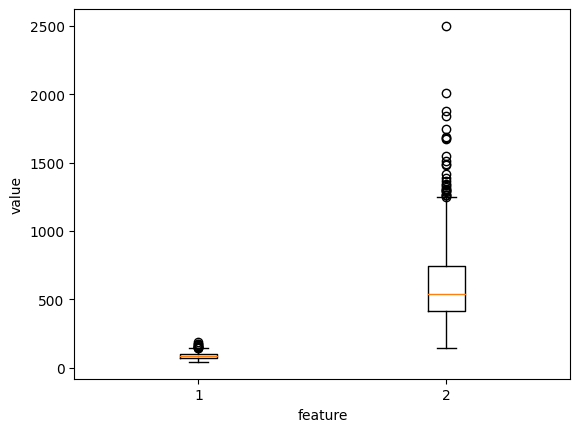

In [20]:
# 훈련데이터 준비하고 스케일 비교
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:,2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

보시다시피 두 특성의 값 차이가 크다.  
이대로 경사하강법을 적용하면 어떻게 될까?  

---

### 가중치를 기록할 변수와 학습율 파라미터 추가하기  

학습률이라는 개념도 도입해보자  
지난번에 만든 SingleLayer()의 init메서드를 아래와 같이 고친다.  
```
  def __init__(self, learning_rate = 0.1):
    self.w = None
    self.b = None
    self.losses =[]
    self.w_history= []
```

여기서 learning_rate는 하이퍼파라미터이며 말 그대로 학습률을 의미한다.  
이 값으로 업데이트의 양을 조절할 것이다.  
  
학습율은 적절해야 한다.  
너무 과도한 학습률은 오히려 최적의 값을 놓치게 한다.  


---
### 가중치를 기록하고 업데이트 양을 조절하기
이제 훈련 메서드에서 가중치가 바뀔 때마다 w_history에 가중치를 기록하겠다.  
아래는 지난번에 만든 SingleLayer 클래스이며 fit 메서드를 수정한다.  

In [30]:
# 지난 시간에 만든 코드
class SingleLayer:
# 지난시간에 만든 SingleLayer 클래스 수정
  def __init__(self, learning_rate = 0.1):
    self.w = None
    self.b = None
    self.losses =[]
    self.w_history= []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   
    return z

  def backprop(self, x, err):
    w_grad = x * err                 
    b_grad = 1 * err                 
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= self.lr * w_grad
        self.b -= b_grad
        # 가중치를 기록합니다.
        self.w_history.append(self.w.copy())
        # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적한다.  
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a))
      # 에포크 마다 평균 손실을 저장합니다.
      self.losses.append(loss/len(y))

  # 시그모이드 함수
  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]    # 정방향 계산
    return np.array(z) > 0                  # 계단함수 적용

  def score(self, x, y):            # 정확도를 계산해주는 메서드
    return np.mean(self.predict(x) == y)

### 모델을 훈련하고 평가하기
이제 이 모델을 훈련하고 평가해보자

In [32]:
layer1 = SingleLayer( )
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

AttributeError: ignored